In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import model_selection
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


In [2]:
#Loading the Data Set
df_train = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
df_test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)
sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

In [3]:
#Printing the values of the train Data Set 
df_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
#Printing the values of the test Data Set
df_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,B,B,B,C,B,B,A,E,E,I,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
5,A,B,A,C,B,C,A,E,C,H,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
15,B,A,A,A,B,B,A,E,D,K,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
16,B,B,A,C,B,D,A,E,A,N,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
17,B,B,A,C,B,C,A,E,C,F,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


<AxesSubplot:>

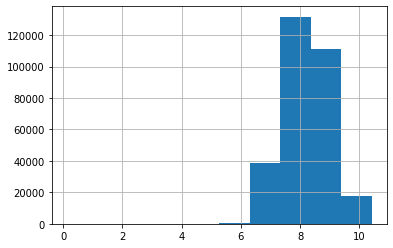

In [5]:
#Plotting the Target Value of train Data Sets
df_train.target.hist()

<AxesSubplot:>

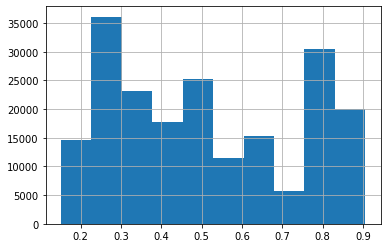

In [6]:
#Plotting the cont13 Value test Data Sets
df_test.cont13.hist()

In [7]:
y = df_train['target']
X = df_train.drop(['target'], axis=1)

# Preview features
X.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [8]:
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


In [ ]:
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def Dataset(df_train, df_test, y_train, y_valid):
    model = XGBRegressor(n_estimators=1000, learning_rate=0.01, n_jobs=4, tree_method = 'gpu_hist')
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

object_cols = [col for col in X.columns if 'cat' in col]
# Creating a Copy to avoid changing in the original data 
Final_X_train = X.copy()
Final_X_valid = df_test.copy()

# Applying Ordinal encoder to each column with # Categorical data
ordinal_encoder = OrdinalEncoder()

# Categorical data


Final_X_train[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
Final_X_valid[object_cols] = ordinal_encoder.transform(df_test[object_cols])

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(Final_X_train, y, random_state=0)

In [11]:
#Training the Model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
Prediction = model.predict(X_valid)
print(mean_squared_error(y_valid, Prediction, squared=False))

0.7375392165180452


In [ ]:
accu_train = np.sum(model.predict(df_test))

In [14]:
preds = model.predict(Final_X_valid)

In [15]:
output = pd.DataFrame({'Id': df_test.index,
                       'target': preds})
output.to_csv('submission.csv', index=False)

In [16]:
output

,Id,target
0,0,7.806032
1,5,8.168332
2,15,8.512519
3,16,8.300955
4,17,8.046720
...,...,...
199995,499987,8.455619
199996,499990,8.275324
199997,499991,8.465943
199998,499994,8.132204
